In [1]:
import sklearn.datasets as dataset
from sklearn.decomposition import PCA
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.manifold import TSNE
from umap import UMAP
windows_height = 1200

c:\Users\intern2\.conda\envs\machineLearnng\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\intern2\.conda\envs\machineLearnng\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\intern2\.conda\envs\machineLearnng\lib\site-packages\umap\distanc

In [2]:
iris = dataset.load_breast_cancer()
X = iris.data
Y = iris.target
print(Y)
print(X)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

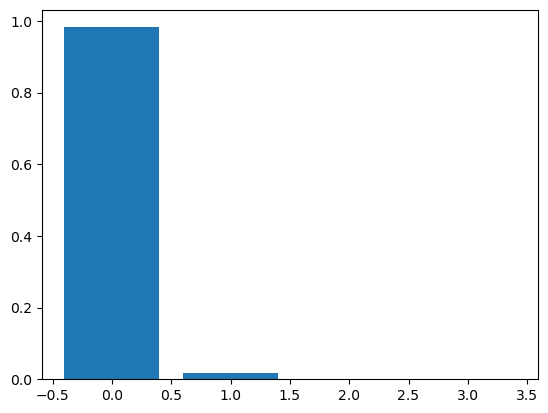

In [3]:
pca = PCA(n_components=4)
new_X = pca.fit(X)
fig = plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.show()
pca2D = PCA(n_components=2)
proj2D = pca.fit_transform(X)
pca3D = PCA(n_components=3)
proj3D = pca.fit_transform(X)
fig_2d = px.scatter(
    proj2D, x=0, y=1,
    color=Y, labels={'color': 'species'}, 
    title = "PCA 2D"
    
)
fig_3d = px.scatter_3d(
    proj3D, x=0, y=1, z=2,
    color=Y, labels={'color': 'species'},
    title = "PCA 3D"
)
fig_3d.update_traces(marker_size=5)

fig_2d.update_layout(height=windows_height).show()
fig_3d.update_layout(height=windows_height).show()

In [6]:
print(type(X))

<class 'numpy.ndarray'>


In [16]:
proj2D = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=50).fit_transform(X)
proj3D = TSNE(n_components=3, learning_rate='auto',init='random', perplexity=50).fit_transform(X)
fig_2d = px.scatter(
    proj2D, x=0, y=1,
    color=Y, labels={'color': 'species'},
    title = "T-SNE 2D"
)
fig_3d = px.scatter_3d(
    proj3D, x=0, y=1, z=2,
    color=Y, labels={'color': 'species'},
    title = "T-SNE 3D"
)
fig_3d.update_traces(marker_size=5)

fig_2d.update_layout(height=windows_height).show()
fig_3d.update_layout(height=windows_height).show()

In [21]:
umap_2d = UMAP(n_components=2, n_neighbors=15, min_dist=0.5, metric='euclidean')
umap_3d = UMAP(n_components=3, n_neighbors=15, min_dist=0.5, metric='euclidean')


proj_2d = umap_2d.fit_transform(X)
proj_3d = umap_3d.fit_transform(X)
fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=Y, labels={'color': 'species'},
    title = "UMAP 2D"
)
fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=Y, labels={'color': 'species'},
    title = "UMAP 3D"
)
fig_3d.update_traces(marker_size=5)

fig_2d.update_layout(height=windows_height).show()
fig_3d.update_layout(height=windows_height).show()